# MAP654I Practical Session 2

Importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp

# 2. Data visualization and pre-processing

## Load the dataset and plot

shape of Xall: (3327, 64) shape of Yall (3327, 1) Fe: [[50]]


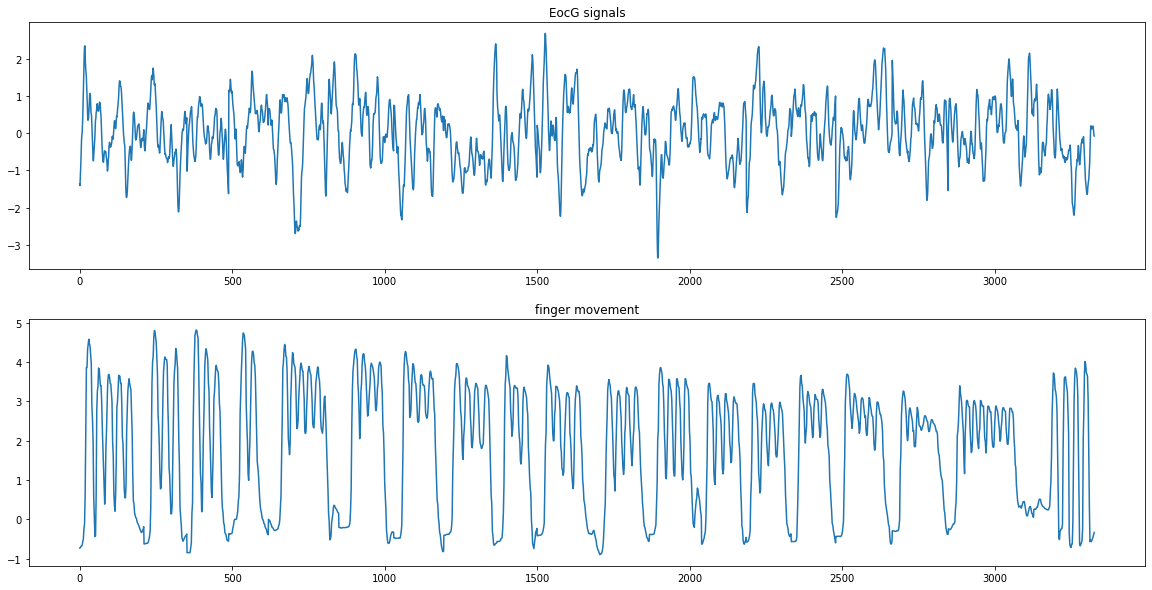

In [2]:
# load data
data_ecog = np.load('ECoG.npz')
Xall = data_ecog['Xall']
Yall = data_ecog['Yall']
Fe = data_ecog['Fe']

print('shape of Xall:', Xall.shape, 'shape of Yall', Yall.shape, 'Fe:', Fe)

# plot signals
pl.figure(figsize = (20, 10))
pl.subplot(211)
pl.plot(Xall[:,0], label='EocG signals')
pl.title('EocG signals')
pl.subplot(212)
pl.plot(Yall[:,0], label='finger movement')
pl.title('finger movement')
pl.show()

## Visualize the data as a scatter plot

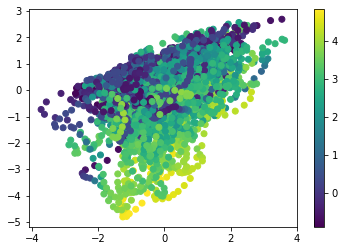

In [3]:
# visualize the data as a scatter plot
pl.figure()

pl.scatter(Xall[:,45], Xall[:,48], c=Yall)

pl.colorbar()
pl.show()

## Split the data in a training and a testing set

In [4]:
# split the data in a training and a testing set
x_train = Xall[:1000,:]
x_test = Xall[1000:,:]

y_train = Yall[:1000,:]
y_test = Yall[1000:,:]

In [5]:
x_train.shape

(1000, 64)

# 3. Least Squares regression (LS)

## Creating training matrix

In [6]:
# create training matrix
X = np.concatenate((x_train, np.ones((x_train.shape[0],1))), axis=1)
print('shape of X:', X.shape)

shape of X: (1000, 65)


Remark: this means I add a column of 1 after the last column of the training set.

## Estimate the LS parameters on the training data

In [7]:
# estimate the LS parameters
param = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_train))
b = param[-1]
w = param[:-1]

Remark: the parameter b should be in the last column

## Predict the finger flexion of the subject on the training and test sets

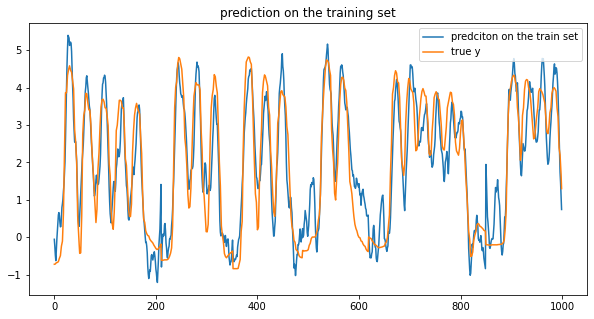

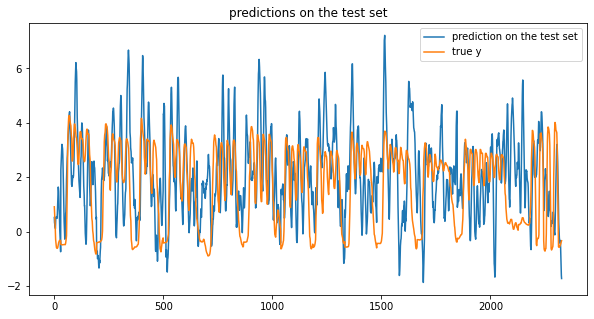

In [8]:
# predict the finger flexion of the subject
predict_train = np.dot(x_train, w) + b


# for test set
predict_test = np.dot(x_test, w) + b


# plot the predictions
pl.figure(figsize=(10,5))
pl.plot(predict_train, label="predciton on the train set")
pl.plot(y_train, label='true y')
pl.title('prediction on the training set')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(predict_test, label='prediction on the test set')
pl.plot(y_test, label='true y')
pl.title('predictions on the test set')
pl.legend()
pl.show()

* The prediction on the test set is not very good compared to the training set, because all the parameters are obtained from the training set, this might lead to ouverfitting. And the training set has a small number of data so the information might not describe the whole model.

## Compute the performance as MSE and R2

In [9]:
# compute the performance
from sklearn.metrics import mean_squared_error, r2_score
# for training set
MSE_train_ls = mean_squared_error(y_train, predict_train)
r2_train_ls = r2_score(y_train, predict_train)

# for test set
MSE_test_ls = mean_squared_error(y_test, predict_test)
r2_test_ls = r2_score(y_test, predict_test)

print("LS: for training set: MSE:", MSE_train_ls, "r2:", r2_train_ls)
print('LS: for test set: MSE:', MSE_test_ls, 'r2:', r2_test_ls)

LS: for training set: MSE: 0.5040654614476062 r2: 0.8395001217500111
LS: for test set: MSE: 3.0455368767601736 r2: -0.4281700630222576


Remark: as we can see, the score on the test set is 6 times worse than training set.

## Estimate a linear regression and check the estimated coefficients

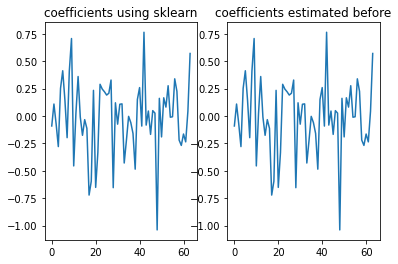

intercept using sklearn:  [1.90081255] estimated before:  [1.90081255]


In [10]:
# estimate a linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

# check the estimated coefficients
coeffs = reg.coef_
inter = reg.intercept_

pl.figure()
pl.subplot(121)
pl.plot(coeffs[0], label='coefficients using sklearn')
pl.title("coefficients using sklearn")
pl.subplot(122)
pl.plot(w, label='coefficients estimated before')
pl.title("coefficients estimated before")
pl.show()

print('intercept using sklearn: ', inter, 'estimated before: ', b)

Remark: all the coefficients are the same

# 4 Ridge regression

## Estimate the ridge predictor on the training data with $\lambda = 1$

In [11]:
# estimate the ridge
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha = 1.0)
clf_ridge.fit(x_train, y_train)

pred_train = clf_ridge.predict(x_train)
pred_test = clf_ridge.predict(x_test)

# comptute the prediction performances on training and test
# for training set
MSE_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

# for test set
MSE_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print("for training set: MSE:", MSE_train, "r2:", r2_train)
print('for test set: MSE:', MSE_test, 'r2:', r2_test)

for training set: MSE: 0.5041768297327897 r2: 0.8394646608871272
for test set: MSE: 3.003842959535568 r2: -0.40861817223916064


Remark: this is very close to the Least Squares regression, the test score is a little better.


## Estimate the Ridge and predict the labels and compute the performance for 100 values of the regularization parameter $\lambda$

(100, 64)


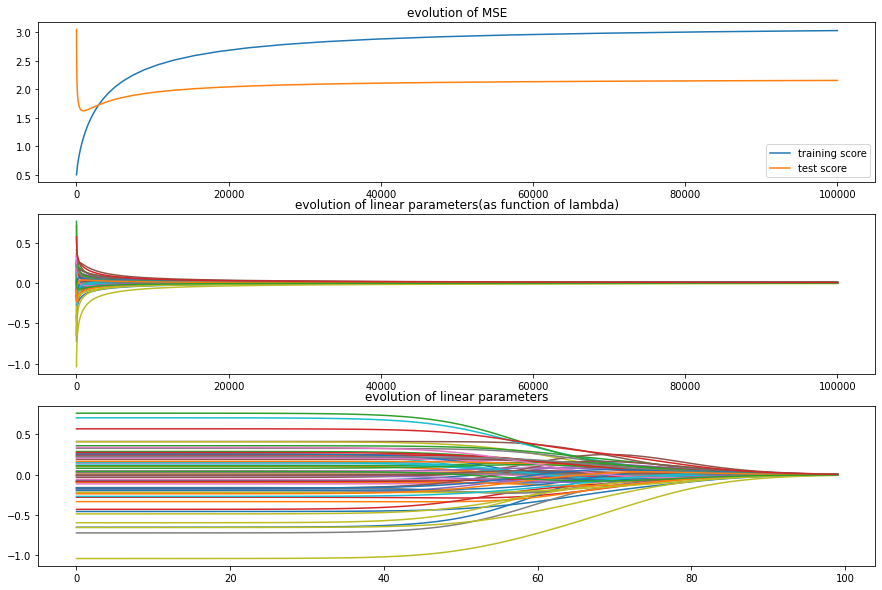

In [12]:
# generate 100 lmbbda
#lambda_range = np.linspace(1e-3, 1e5, 100)
lambda_range = np.logspace(-3, 5, 100)
MSE_train = []

MSE_test = []
param = []
for i in lambda_range:
  clf_ridge = Ridge(alpha = i)
  clf_ridge.fit(x_train, y_train)
  pred_train = clf_ridge.predict(x_train)
  pred_test = clf_ridge.predict(x_test)

  MSE_train.append(mean_squared_error(y_train, pred_train))
  MSE_test.append(mean_squared_error(y_test, pred_test))

  param.append(clf_ridge.coef_[0])

param = np.array(param)
print(param.shape)
# plot 2 subplots
pl.figure(figsize=(15, 10))
pl.subplot(311)
pl.plot(lambda_range, MSE_train, label='training score')
pl.plot(lambda_range, MSE_test, label='test score')
pl.legend()
pl.title('evolution of MSE')
pl.subplot(312)
pl.plot(lambda_range,param)
#pl.legend(lambda_range)
pl.title('evolution of linear parameters(as function of lambda)')
pl.subplot(313)
pl.plot(param)
#pl.legend(lambda_range)
pl.title('evolution of linear parameters')
pl.show()

Remark: We can see that when lambda grows, above a certain threshold, the parameters start to shrink, with different speed, when lambda is very large, all parameters tend to 0, but in ridge regression, all parameters are not 0.

## Select the value of $\lambda$ having the best performance

In [13]:
# select lambda
lambda_opt = lambda_range[np.argmin(MSE_test)]
print('the optimal lambda value is: ', lambda_opt, '\n the best MSE: ', np.min(MSE_test))

# estimate a Ridge with the value
clf_ridge_best = Ridge(alpha=lambda_opt)
clf_ridge_best.fit(x_train, y_train)

the optimal lambda value is:  954.5484566618347 
 the best MSE:  1.6239059826952074


Ridge(alpha=954.5484566618347)

## Predict the finger flexion of the subject on the training and test sets

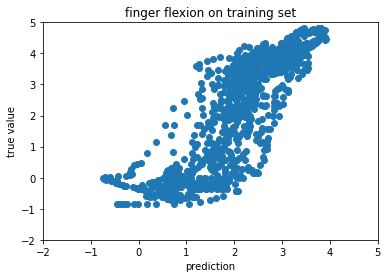

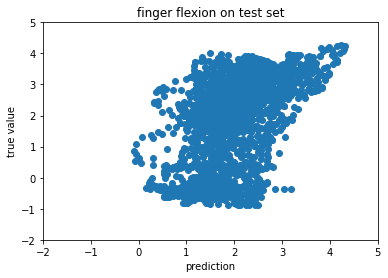

In [14]:
# predict finger flexion on tranining and test sets
pred_train = clf_ridge_best.predict(x_train)
pred_test = clf_ridge_best.predict(x_test)

pl.figure()
pl.scatter(pred_train, y_train)
pl.xlabel('prediction')
pl.ylabel('true value')
pl.title('finger flexion on training set')
pl.xlim(-2, 5)
pl.ylim(-2, 5)
pl.show()

pl.figure()
pl.scatter(pred_test, y_test)
pl.xlabel('prediction')
pl.ylabel('true value')
pl.title('finger flexion on test set')
pl.xlim(-2, 5)
pl.ylim(-2, 5)
pl.show()

Remark: we can see in training set, the points are more or less in the diagnoal of the plot, means most of the predictions are correct, but for test set is not, points are in the whole space, the predictions are not as good as training set. What should be noticed is that when the movement is large (y > 3.5) the prediction on the training and test set is very correct, this is because the flexion is so large and easy to predict.

## Plot the prediction along with the true y as a function of time

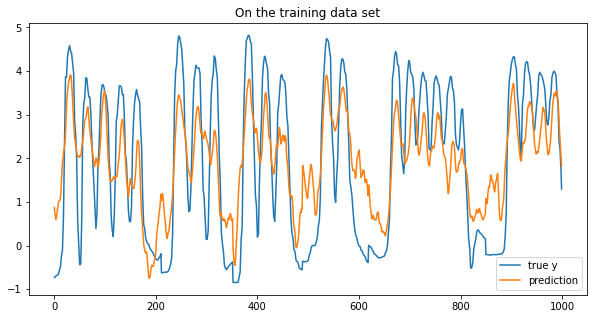

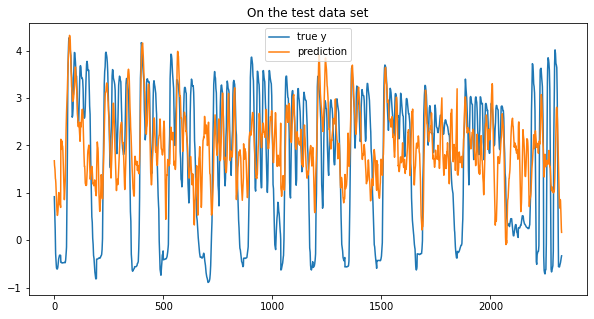

In [15]:
# plot the predcitons with the true y
pl.figure(figsize=(10, 5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='prediction')
pl.title('On the training data set')
pl.legend()
pl.show()


pl.figure(figsize=(10, 5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='prediction')
pl.title('On the test data set')
pl.legend()
pl.show()


Remark: the prediction on test set is not so good because the peaks are not well estimated, but we can still see the movement of the finger through the prediction, so in this application, the prediction is better than the LS estimation.

## Compute the performance as MSE and R2 on training and test data

In [16]:
# for training set
MSE_train_ridge = mean_squared_error(y_train, pred_train)
r2_train_ridge = r2_score(y_train, pred_train)

# for test set
MSE_test_ridge = mean_squared_error(y_test, pred_test)
r2_test_ridge = r2_score(y_test, pred_test)

print("Ridge: for training set: MSE:", MSE_train_ridge, "r2:", r2_train_ridge)
print('Ridge： for test set: MSE:', MSE_test_ridge, 'r2:', r2_test_ridge)
print("the scores using LS:")
print('for training set: MSE: 0.5040654614476062 r2: 0.8395001217500111, \nfor test set: MSE: 3.0455368767601736 r2: -0.4281700630222576')

Ridge: for training set: MSE: 1.1719430382009632 r2: 0.6268406996047915
Ridge： for test set: MSE: 1.6239059826952074 r2: 0.23848766129037868
the scores using LS:
for training set: MSE: 0.5040654614476062 r2: 0.8395001217500111, 
for test set: MSE: 3.0455368767601736 r2: -0.4281700630222576


* We can see that the MSE score for training set is increased and r2 score is decreased.  
For test set, the MSE is decreased and r2 score is increased from negative to positive. This means the result is much better than LS estimator.

## Interpret the classifiers w for both LS and Ridge estimator by plotting their values and their absolute values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a s

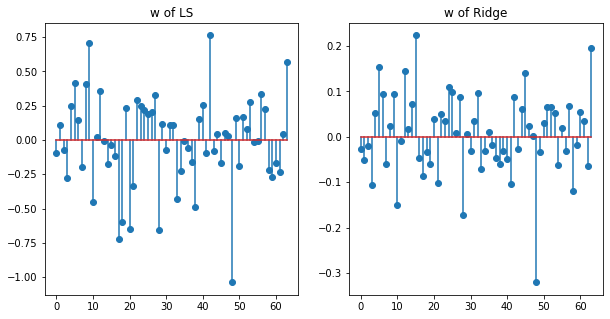

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning an

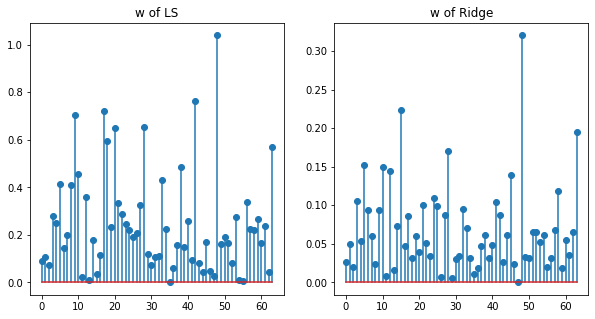

In [17]:
# values
pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(w)
pl.title("w of LS")
pl.subplot(122)
pl.stem(clf_ridge_best.coef_[0])
pl.title("w of Ridge")
pl.show()

# absolute values
pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(np.abs(w))
pl.title("w of LS")
pl.subplot(122)
pl.stem(np.abs(clf_ridge_best.coef_[0]))
pl.title("w of Ridge")
pl.show()

* By seeing the w value, we need notice the scale is different, the w value of ridge regression is lower than LS, this is true because ridge regularization will force small value of parameters, but the important variables are the same in both cases, means that the large value remains large both in LS and Ridge, Ridge regression won't change the important variables.

# 5 Variable selection with the Lasso

## Estimate the Lasso predictor

In [18]:
# estimate the Lasso predictor
from sklearn.linear_model import Lasso
clf_l = Lasso()

clf_l.fit(x_train, y_train)


Lasso()

## Predict and compute performances

for training set: MSE: 3.1405971577280063 r2: 0.0
for test set: MSE: 2.190675841640482 r2: -0.02729265197579034


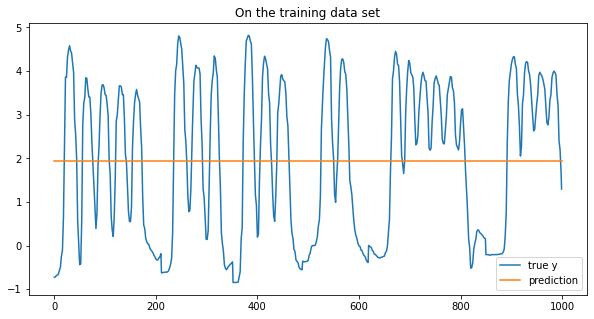

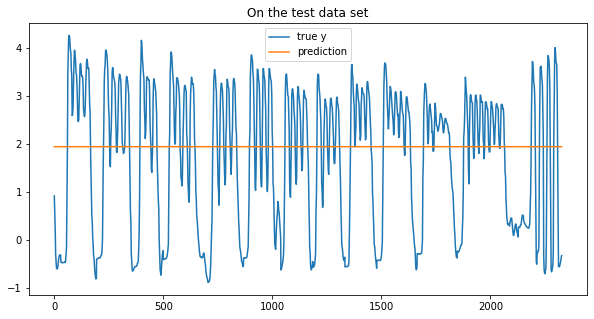

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


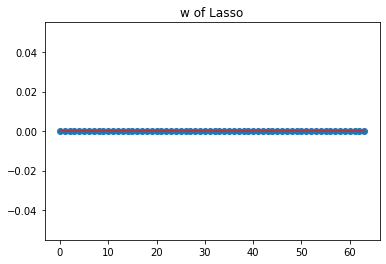

In [19]:
# predict & compute the prediction performances on training and test set 
pred_train = clf_l.predict(x_train)
pred_test = clf_l.predict(x_test)

# comptute the prediction performances on training and test
# for training set
MSE_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

# for test set
MSE_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print("for training set: MSE:", MSE_train, "r2:", r2_train)
print('for test set: MSE:', MSE_test, 'r2:', r2_test)

# plot the model
pl.figure(figsize=(10, 5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='prediction')
pl.title('On the training data set')
pl.legend()
pl.show()


pl.figure(figsize=(10, 5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='prediction')
pl.title('On the test data set')
pl.legend()
pl.show()

pl.figure()
pl.stem(clf_l.coef_)
pl.title("w of Lasso")
pl.show()

* I noticed that all coefficients are 0 and the estimated linear model is a line, the training and test score is both bad. This is because the regularization of Lasso is too strong, it forces all the parameters to be 0.

## Estimate the Lasso and predict the labels and compute the performance for 100 values

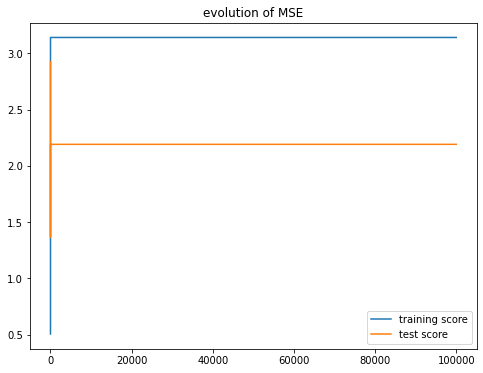

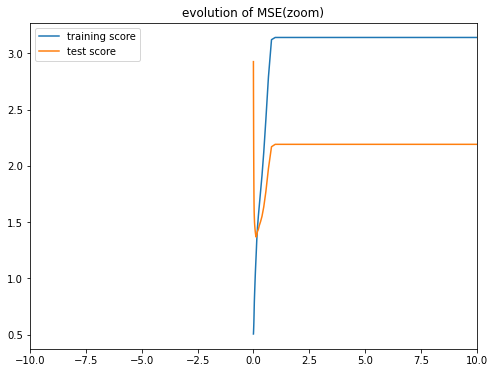

In [20]:
# generate 100 lmbbda
lambda_range = np.logspace(-3, 5, 100)
MSE_train = []

MSE_test = []
#param = []
for i in lambda_range:
  clf_l = Lasso(alpha = i)
  clf_l.fit(x_train, y_train)
  pred_train = clf_l.predict(x_train)
  pred_test = clf_l.predict(x_test)

  MSE_train.append(mean_squared_error(y_train, pred_train))
  MSE_test.append(mean_squared_error(y_test, pred_test))
  #param.append(clf_l.coef_)

#param = np.array(param)
#print(param.shape)  

# plot evolution of the MSE
pl.figure(figsize=(8, 6))
pl.plot(lambda_range, MSE_train, label='training score')
pl.plot(lambda_range, MSE_test, label='test score')
pl.legend()
pl.title('evolution of MSE')
pl.show()
pl.figure(figsize=(8, 6))
pl.plot(lambda_range, MSE_train, label='training score')
pl.plot(lambda_range, MSE_test, label='test score')
pl.xlim(-10,10)
pl.legend()
pl.title('evolution of MSE(zoom)')
pl.show()
#pl.figure(figsize=(8, 6))
#pl.plot(param)
#pl.show()

## Select the value of lambda with best performence

In [21]:
# select lambda
lambda_opt_l = lambda_range[np.argmin(MSE_test)]
print('the optimal lambda value is: ', lambda_opt_l, '\n the best MSE: ', np.min(MSE_test))

# estimate a Ridge with the value
clf_l_best = Lasso(alpha=lambda_opt_l)
clf_l_best.fit(x_train, y_train)

the optimal lambda value is:  0.1261856883066021 
 the best MSE:  1.3659542352560023


Lasso(alpha=0.1261856883066021)

## Predict finger flexion on tranining and test sets

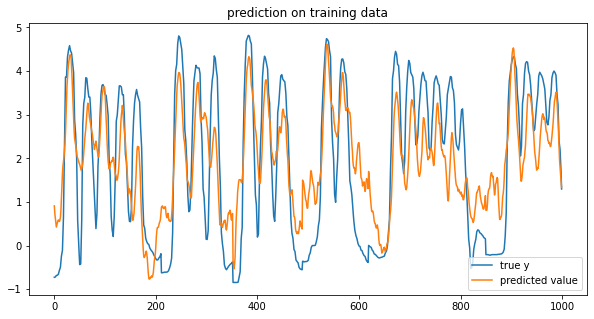

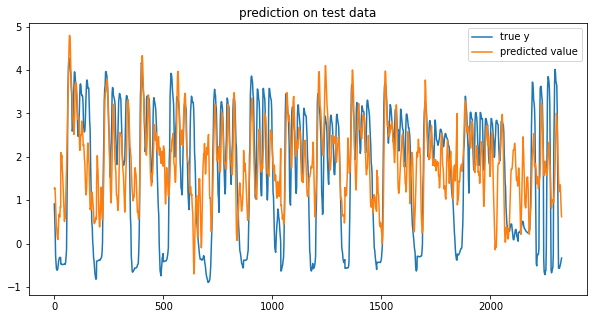

Lasso: for training set: MSE: 1.2215631527944377 r2: 0.6110411200657935
Lasso: for test set: MSE: 1.3659542352560023 r2: 0.359451214944292


In [22]:
# predict finger flexion on tranining and test sets
pred_train = clf_l_best.predict(x_train)
pred_test = clf_l_best.predict(x_test)

# plot the predictions with the true y
pl.figure(figsize=(10,5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='predicted value')
pl.title('prediction on training data')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='predicted value')
pl.title('prediction on test data')
pl.legend()
pl.show()

# for training set
MSE_train_l = mean_squared_error(y_train, pred_train)
r2_train_l = r2_score(y_train, pred_train)

# for test set
MSE_test_l = mean_squared_error(y_test, pred_test)
r2_test_l = r2_score(y_test, pred_test)

print("Lasso: for training set: MSE:", MSE_train_l, "r2:", r2_train_l)
print('Lasso: for test set: MSE:', MSE_test_l, 'r2:', r2_test_l)

Remark: This seems to be better than Ridge on the test set since all the movements are well estimated and the peaks are also well fitted.

## Interpert the classifiers w for the Lasso estimator by plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


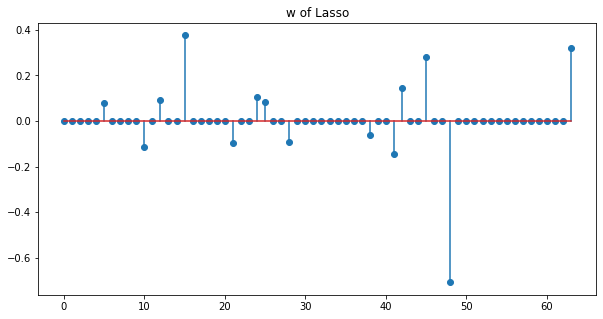

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


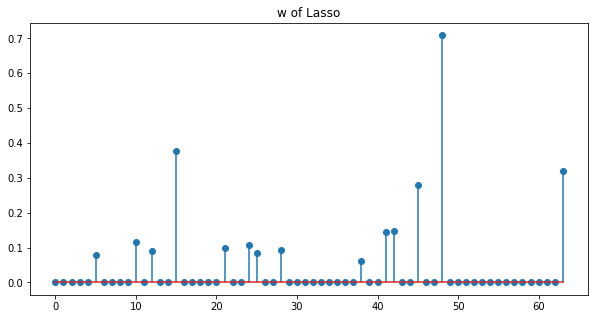

In [23]:
# values
pl.figure(figsize=(10,5))

pl.stem(clf_l_best.coef_)
pl.title("w of Lasso")
pl.show()

# absolute values
pl.figure(figsize=(10,5))

pl.stem(np.abs(clf_l_best.coef_))
pl.title("w of Lasso")
pl.show()

* We can see that the variable with largest value is 15 and 48, these are the most important variables, we can notice that variable 45 and 48 are also large, this is what we seen at the begining with the scatter plot where the samples are seperable.

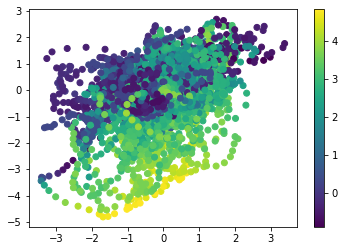

In [24]:
pl.figure()
pl.scatter(Xall[:,15], Xall[:,48], c=Yall)
pl.colorbar()
pl.show()

## How many feautres were selected bu the Lasso

In [25]:
# features selected by the lasso
features = np.where(clf_l_best.coef_ != 0)[0]
print('variables selected', features)
print('number of features selected: ', len(features))

variables selected [ 5 10 12 15 21 24 25 28 38 41 42 45 48 63]
number of features selected:  14


* In total 14 features were selected by the Lasso, this means we can use only 14 electrodes.

# 6 Nonlinear regression

In [26]:
print('All the score for every method:')
print("LS: for training set: MSE:", MSE_train_ls, "r2:", r2_train_ls)
print('LS: for test set: MSE:', MSE_test_ls, 'r2:', r2_test_ls)
print('\n')
print("Ridge: for training set: MSE:", MSE_train_ridge, "r2:", r2_train_ridge)
print('Ridge： for test set: MSE:', MSE_test_ridge, 'r2:', r2_test_ridge)
print('\n')
print("Lasso: for training set: MSE:", MSE_train_l, "r2:", r2_train_l)
print('Lasso: for test set: MSE:', MSE_test_l, 'r2:', r2_test_l)
print('\n')

All the score for every method:
LS: for training set: MSE: 0.5040654614476062 r2: 0.8395001217500111
LS: for test set: MSE: 3.0455368767601736 r2: -0.4281700630222576


Ridge: for training set: MSE: 1.1719430382009632 r2: 0.6268406996047915
Ridge： for test set: MSE: 1.6239059826952074 r2: 0.23848766129037868


Lasso: for training set: MSE: 1.2215631527944377 r2: 0.6110411200657935
Lasso: for test set: MSE: 1.3659542352560023 r2: 0.359451214944292




## RandomForest

### Fit the model with default parameters and compute performence.

In [27]:
# redaom forest regressor
from sklearn.ensemble import RandomForestRegressor
# fit the model
regr_rf = RandomForestRegressor()
regr_rf.fit(x_train, y_train.ravel())

# predict
pred_train_rf = regr_rf.predict(x_train)
pred_test_rf = regr_rf.predict(x_test)

# prediction performance
MSE_train_rf = mean_squared_error(y_train, pred_train_rf)
r2_train_rf = r2_score(y_train, pred_train_rf)

MSE_test_rf = mean_squared_error(y_test, pred_test_rf)
r2_test_rf = r2_score(y_test, pred_test_rf)
print('Using RandomForestRegressor: ')
print("RF: for training set: MSE:", MSE_train_rf, "r2:", r2_train_rf)
print('RF: for test set: MSE:', MSE_test_rf, 'r2:', r2_test_rf)

Using RandomForestRegressor: 
RF: for training set: MSE: 0.024185410245349263 r2: 0.9922991045872163
RF: for test set: MSE: 1.6796858225894127 r2: 0.21233033643085375


* The training score is better than LS Ridge and Lasso, but the test score is only better than LS.

### Validate some of the important parameters in order to maximize the performance on test

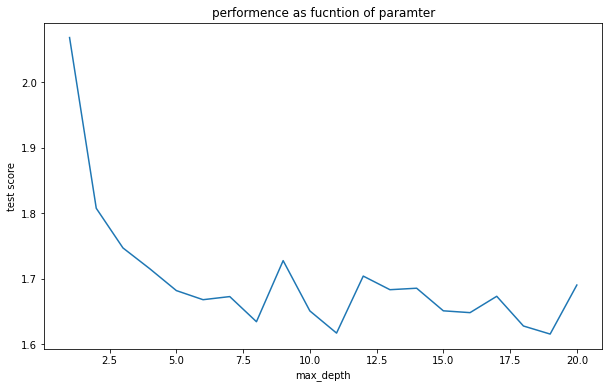

the best test MSE is:  1.6155761571742742
the best max_depth is:  19.0


In [28]:
# change the parameter max_depth
max_depth_list = np.linspace(1, 20, 20)
MSE_test_list_rf = []
m = np.inf
for i in max_depth_list:
  regr_rf = RandomForestRegressor(max_depth=i)
  regr_rf.fit(x_train, y_train.ravel())
  # predict
  pred_train = regr_rf.predict(x_train)
  pred_test = regr_rf.predict(x_test)
  # prediction performance
  MSE = mean_squared_error(y_test, pred_test)
  MSE_test_list_rf.append(MSE)
  if MSE < m:
    m = MSE
    best_param = i
    regr_rf_best = regr_rf
# plot
pl.figure(figsize=(10, 6))
pl.plot(max_depth_list, MSE_test_list_rf)
pl.xlabel('max_depth')
pl.ylabel('test score')
pl.title('performence as fucntion of paramter')
pl.show()

print('the best test MSE is: ', m)
print('the best max_depth is: ', best_param)

* By trying 20 values of max_depth, we get the best MSE on test data is 1.61, which is very close to the default parameter. So the performence of RF do not very dependent on the max_depth, notice that the result of RF is random, so it is hard to choose the right parameter.

### Plot the predictions along with the ture y as a function of time

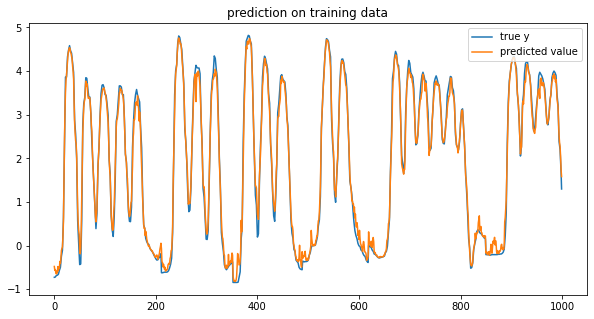

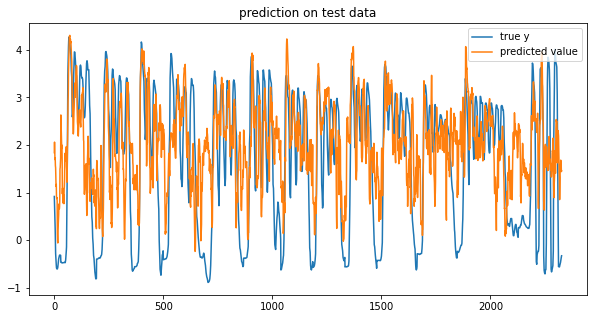

RF: for training set: MSE: 0.024329380386616684 r2: 0.9922532629418104
RF: for test set: MSE: 1.6155761571742742 r2: 0.2423938387298884


In [29]:
# predict
pred_train = regr_rf_best.predict(x_train)
pred_test = regr_rf_best.predict(x_test)

# plot the predictions with the true y
pl.figure(figsize=(10,5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='predicted value')
pl.title('prediction on training data')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='predicted value')
pl.title('prediction on test data')
pl.legend()
pl.show()

# for training set
MSE_train_rf_best = mean_squared_error(y_train, pred_train)
r2_train_rf_best = r2_score(y_train, pred_train)

# for test set
MSE_test_rf_best = mean_squared_error(y_test, pred_test)
r2_test_rf_best = r2_score(y_test, pred_test)

print("RF: for training set: MSE:", MSE_train_rf_best, "r2:", r2_train_rf_best)
print('RF: for test set: MSE:', MSE_test_rf_best, 'r2:', r2_test_rf_best)

* The RF method estimated well the training data, but worse on testing, this is overfitting on the model, and the test result is close to Lasso and Ridge, the movement of the finger can be found but in samples after 2000, the prediction is not accurate.

## SVR

### Fit the model with default parameters and compute performence.

In [30]:
# support vector regression
from sklearn.svm import SVR
# fit the model
regr_svr = SVR()
regr_svr.fit(x_train, y_train.ravel())

# predict
pred_train_svr = regr_svr.predict(x_train)
pred_test_svr = regr_svr.predict(x_test)

# prediction performance
MSE_train_svr = mean_squared_error(y_train, pred_train_svr)
r2_train_svr = r2_score(y_train, pred_train_svr)

MSE_test_svr = mean_squared_error(y_test, pred_test_svr)
r2_test_svr = r2_score(y_test, pred_test_svr)
print('Using SVR: ')
print("SVR: for training set: MSE:", MSE_train_svr, "r2:", r2_train_svr)
print('SVR: for test set: MSE:', MSE_test_svr, 'r2:', r2_test_svr)

Using SVR: 
SVR: for training set: MSE: 0.024085982516610357 r2: 0.9923307634481734
SVR: for test set: MSE: 1.515182870123942 r2: 0.28947213490412815


* The training score is better than LS Ridge and Lasso, but the test score is only better than LS.

In [42]:
# change the parameter C
C_list = np.linspace(0.1, 1.5, 10)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
MSE_test_list_svr = []
m = np.inf
for k in kernel:
  for i in C_list:
    regr_svr = SVR(C=i)
    regr_svr.fit(x_train, y_train.ravel())
    # predict
    pred_train = regr_svr.predict(x_train)
    pred_test = regr_svr.predict(x_test)
    # prediction performance
    MSE = mean_squared_error(y_test, pred_test)
    #MSE_test_list_svr.append(MSE)
    if MSE < m:
      m = MSE
      best_param = i
      best_k = k
      regr_svr_best = regr_svr
# plot
#pl.figure(figsize=(10, 6))
#pl.plot(C_list, MSE_test_list_svr)
#pl.xlabel('C')
#pl.ylabel('test score')
#pl.title('performence as fucntion of paramter')
#pl.show()

print('the best test MSE is: ', m)
print('the best C is: ', best_param)
print('the best kernel is: ', best_k)

the best test MSE is:  1.5113755200273555
the best C is:  0.7222222222222222
the best kernel is:  linear


* By trying different kernel and C value, we get the best performance very similar to the default parameters, so the SVR model do not dependent a lot on the parameters.

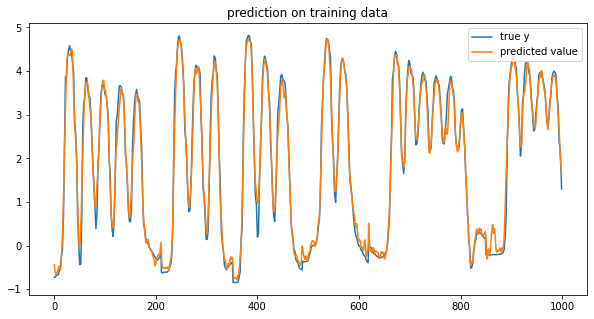

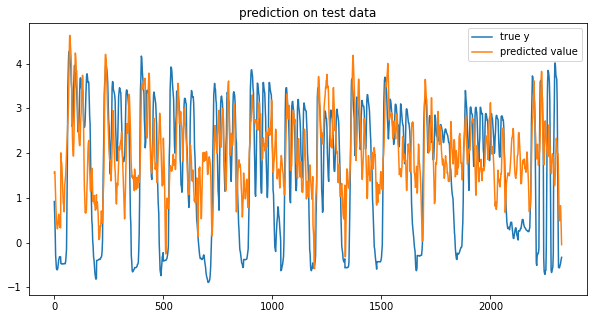

SVR: for training set: MSE: 0.04126747788675688 r2: 0.9868599900546905
SVR: for test set: MSE: 1.5113755200273555 r2: 0.2912575486579009


In [43]:
# predict
pred_train = regr_svr_best.predict(x_train)
pred_test = regr_svr_best.predict(x_test)

# plot the predictions with the true y
pl.figure(figsize=(10,5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='predicted value')
pl.title('prediction on training data')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='predicted value')
pl.title('prediction on test data')
pl.legend()
pl.show()

# for training set
MSE_train_svr_best = mean_squared_error(y_train, pred_train)
r2_train_svr_best = r2_score(y_train, pred_train)

# for test set
MSE_test_svr_best = mean_squared_error(y_test, pred_test)
r2_test_svr_best = r2_score(y_test, pred_test)

print("SVR: for training set: MSE:", MSE_train_svr_best, "r2:", r2_train_svr_best)
print('SVR: for test set: MSE:', MSE_test_svr_best, 'r2:', r2_test_svr_best)

* The model has a lot overfitting, the test result is like before, we can see the movement by the peaks of the signal, but when the samples are larger than 1500, it's hard to recognize any information.

## MLPRegressor

### Fit the model with default parameters and compute performence.

In [33]:
# MLP classifier
from sklearn.neural_network import MLPRegressor
# fit the model
regr_mlp = MLPRegressor()
regr_mlp.fit(x_train, y_train.ravel())

# predict
pred_train_mlp = regr_mlp.predict(x_train)
pred_test_mlp = regr_mlp.predict(x_test)

# prediction performance
MSE_train_mlp = mean_squared_error(y_train, pred_train_mlp)
r2_train_mlp = r2_score(y_train, pred_train_mlp)

MSE_test_mlp = mean_squared_error(y_test, pred_test_mlp)
r2_test_mlp = r2_score(y_test, pred_test_mlp)
print('Using MLPRegressor: ')
print("MLP: for training set: MSE:", MSE_train_mlp, "r2:", r2_train_mlp)
print('MLP: for test set: MSE:', MSE_test_mlp, 'r2:', r2_test_mlp)

Using MLPRegressor: 
MLP: for training set: MSE: 0.00887525282817316 r2: 0.9971740237978838
MLP: for test set: MSE: 2.4152044097852063 r2: -0.13258278382888755


* The training score is far better than LS Ridge and Lasso, but the test score is only better than LS. This is might be overfitting.

In [44]:
# change the parameter alpha
alpha_list = np.linspace(0.0001, 0.01, 30)
hidden_layer_sizes = [70, 80, 90, 100, 110]

MSE_test_list_mlp = []
m = np.inf
for h in hidden_layer_sizes:
  for i in alpha_list:
    regr_mlp = MLPRegressor(alpha=i)
    regr_mlp.fit(x_train, y_train.ravel())
    # predict
    pred_train = regr_mlp.predict(x_train)
    pred_test = regr_mlp.predict(x_test)
    # prediction performance
    MSE = mean_squared_error(y_test, pred_test)
    MSE_test_list_mlp.append(MSE)
    if MSE < m:
      m = MSE
      best_param = i
      best_layer = h
      regr_mlp_best = regr_mlp
# plot
#pl.figure(figsize=(10, 6))
#pl.plot(alpha_list, MSE_test_list_mlp)
#pl.xlabel('alpha')
#pl.ylabel('test score')
#pl.title('performence as fucntion of paramter')
#pl.show()

print('the best test MSE is: ', m)
print('the best alpha is: ', best_param)
print('the best hidden_layer_sizes is: ', best_layer)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


the best test MSE is:  1.9179949728803234
the best alpha is:  0.008975862068965518
the best hidden_layer_sizes is:  90


* We can see that the test MSE is a lot better than the defaut parameters, if we use correct hidden_layer_sizes and alpha, this is true because the MLP is hard to tune, and the parameters can inflence a lot on the result.

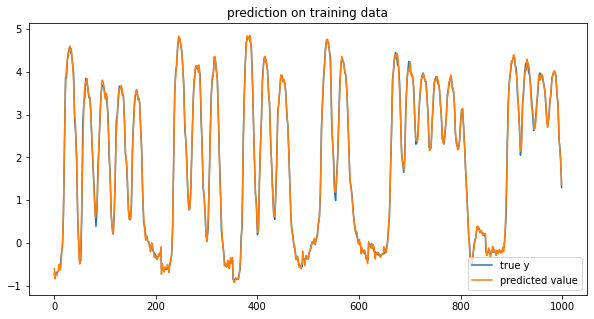

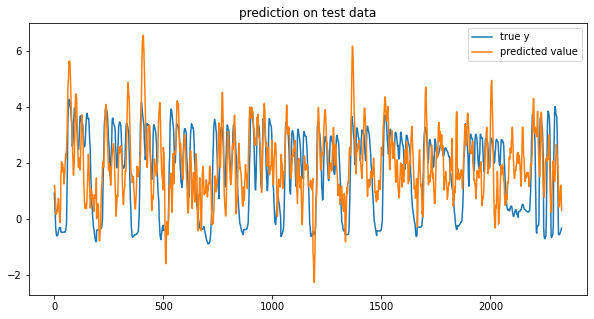

MLP: for training set: MSE: 0.0076140280374129305 r2: 0.9975756113710167
MLP: for test set: MSE: 1.9179949728803234 r2: 0.1005779564853484


In [45]:
# predict
pred_train = regr_mlp_best.predict(x_train)
pred_test = regr_mlp_best.predict(x_test)

# plot the predictions with the true y
pl.figure(figsize=(10,5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='predicted value')
pl.title('prediction on training data')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='predicted value')
pl.title('prediction on test data')
pl.legend()
pl.show()

# for training set
MSE_train_mlp_best = mean_squared_error(y_train, pred_train)
r2_train_mlp_best = r2_score(y_train, pred_train)

# for test set
MSE_test_mlp_best = mean_squared_error(y_test, pred_test)
r2_test_mlp_best = r2_score(y_test, pred_test)

print("MLP: for training set: MSE:", MSE_train_mlp_best, "r2:", r2_train_mlp_best)
print('MLP: for test set: MSE:', MSE_test_mlp_best, 'r2:', r2_test_mlp_best)

* After choosing correct paramters, the result is still worse than the other method, the overfitting is the most, and the test signal is very hard to tell any useful information.

## Gradient Boosting Regressor

### Fit the model with default parameters and compute performence.

In [36]:
# GB regressor
from sklearn.ensemble import GradientBoostingRegressor
# fit the model
regr_GB = GradientBoostingRegressor()
regr_GB.fit(x_train, y_train.ravel())

# predict
pred_train_GB = regr_GB.predict(x_train)
pred_test_GB = regr_GB.predict(x_test)

# prediction performance
MSE_train_GB = mean_squared_error(y_train, pred_train_GB)
r2_train_GB = r2_score(y_train, pred_train_GB)

MSE_test_GB = mean_squared_error(y_test, pred_test_GB)
r2_test_GB = r2_score(y_test, pred_test_GB)
print('Using RandomForestRegressor: ')
print("GB: for training set: MSE:", MSE_train_GB, "r2:", r2_train_GB)
print('GB: for test set: MSE:', MSE_test_GB, 'r2:', r2_test_GB)

Using RandomForestRegressor: 
GB: for training set: MSE: 0.11333713838888566 r2: 0.9639122330254936
GB: for test set: MSE: 1.6760838595528351 r2: 0.21401943624645847


* The training score is far better than LS Ridge and Lasso, but the test score is only better than LS and very close to Ridge regression.

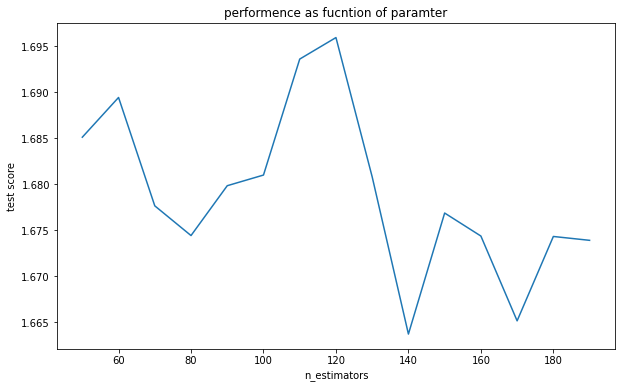

the best test MSE is:  1.6637428526268736
the best n_estimators is:  140


In [52]:
# change the parameter n_estimators
n_estimators_list = range(50,200,10)
MSE_test_list_mlp = []
m = np.inf
for i in n_estimators_list:
  regr_GB = GradientBoostingRegressor(n_estimators=i)
  regr_GB.fit(x_train, y_train.ravel())
  # predict
  pred_train = regr_GB.predict(x_train)
  pred_test = regr_GB.predict(x_test)
  # prediction performance
  MSE = mean_squared_error(y_test, pred_test)
  MSE_test_list_mlp.append(MSE)
  if MSE < m:
    m = MSE
    best_param = i
    regr_GB_best = regr_GB
# plot
pl.figure(figsize=(10, 6))
pl.plot(n_estimators_list, MSE_test_list_mlp)
pl.xlabel('n_estimators')
pl.ylabel('test score')
pl.title('performence as fucntion of paramter')
pl.show()

print('the best test MSE is: ', m)
print('the best n_estimators is: ', best_param)

* If we validate paramter n_estimators, the test MSE is close to the default parameter, so it's not very dependent on the n_estimators.

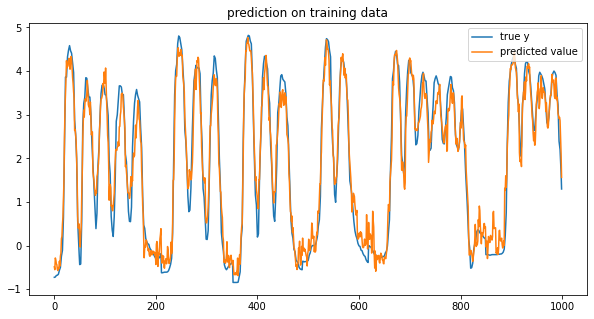

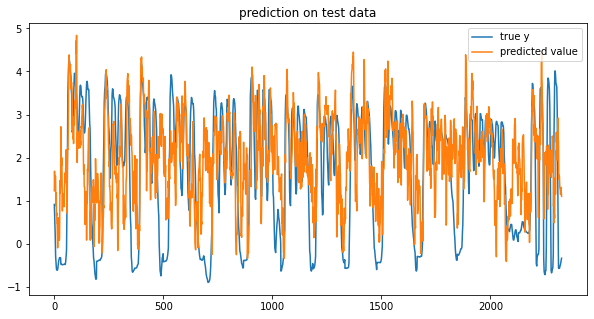

GB: for training set: MSE: 0.1289503512482483 r2: 0.9589408176941947
GB: for test set: MSE: 1.6745160951182667 r2: 0.21475462164132497


In [47]:
# predict
pred_train = regr_GB_best.predict(x_train)
pred_test = regr_GB_best.predict(x_test)

# plot the predictions with the true y
pl.figure(figsize=(10,5))
pl.plot(y_train, label='true y')
pl.plot(pred_train, label='predicted value')
pl.title('prediction on training data')
pl.legend()
pl.show()

pl.figure(figsize=(10,5))
pl.plot(y_test, label='true y')
pl.plot(pred_test, label='predicted value')
pl.title('prediction on test data')
pl.legend()
pl.show()

# for training set
MSE_train_GB_best = mean_squared_error(y_train, pred_train)
r2_train_GB_best = r2_score(y_train, pred_train)

# for test set
MSE_test_GB_best = mean_squared_error(y_test, pred_test)
r2_test_GB_best = r2_score(y_test, pred_test)

print("GB: for training set: MSE:", MSE_train_GB_best, "r2:", r2_train_GB_best)
print('GB: for test set: MSE:', MSE_test_GB_best, 'r2:', r2_test_GB_best)

* Just like before, we can see the finger movement but after 1500 samples, the estimation is not right.

# 7 Final comparision of the performances

## Collect the test performances for all methods investigated above in a table.(dataframe)

In [53]:
# create dataframe
import pandas as pd
dict = {'name': ['least squares regression', 'ridge regression', 'lasso regression', 'random forest', 'svr', 'mlp', 'gradient boosting regressor'],
        'test MSE': [MSE_test_ls, MSE_test_ridge, MSE_test_l, MSE_test_rf_best, MSE_test_svr_best, MSE_test_mlp_best, MSE_test_GB_best],
        'test r2': [r2_test_ls, r2_test_ridge, r2_test_l, r2_test_rf_best, r2_test_svr_best, r2_test_mlp_best, r2_test_GB_best]}
data_df = pd.DataFrame(dict)
data_df.set_index('name', inplace=True)
data_df = data_df.round({'test MSE':3, 'test r2': 3})
print(data_df)
print('\n---sorted resutl---')
print(data_df.sort_values(by='test MSE'))

                             test MSE  test r2
name                                          
least squares regression        3.046   -0.428
ridge regression                1.624    0.238
lasso regression                1.366    0.359
random forest                   1.616    0.242
svr                             1.511    0.291
mlp                             1.918    0.101
gradient boosting regressor     1.675    0.215

---sorted resutl---
                             test MSE  test r2
name                                          
lasso regression                1.366    0.359
svr                             1.511    0.291
random forest                   1.616    0.242
ridge regression                1.624    0.238
gradient boosting regressor     1.675    0.215
mlp                             1.918    0.101
least squares regression        3.046   -0.428


* We can see that the Lasso regression gives the best performance.

## What are the most interpretable models

* For the interpretability, I think the best is the lasso, ridge, because they can give us the important variables and can explain which factor plays the most role, and the MLP is the hardest to interpret since the network itself is hard to interpret. 

## Which model is best from a medical/ practical perspertive.

* I think the lasso is the best model in practice, on the one hand, it gives the best performance, and the predicted singal is most close to the original siganl, all movements can be found and the absolute value is also close, also, it gives us the important variables that we can use to reduce the numeber of electrods and can let us know which factor has the biggest influence on the estimation.

## Do we need non-linearity in this application.

* I don't think we need non-linearity here because the input data is is not complex, the variables have a lot correlation so the model could be reduced to linear seperable. and it can be well estimated by lasso regression, if we add non linearity as we can seen above, it leads to overfitting, means the model is too complex in this application.

## Is validation on the test data a good practice, what would you do if you need to provide a model to a client for prediction in production.

* Validation on the test data is not a good practice because we will test on the same set, we should seperate test and validation. In practice, we can take validation set from training set, and after the validation we use the correct parameters on the test set to show our performance.  
If I need to provide a model, I first will ask them to give a large dataset with labels, and take most of it as the training set, a little as validation and the rest as test. I will train my model on the training set, and do parameters selection on validation set. Then I will test my model on the test set, this pipline I will do on various kind of model in order to get the best one, the test score shouldn't be too differenct from the model in real practice. If my model is interpretable, I will try to give the client the important reasons influencing the production.

# Discussion

In this part, we do the regression with supervised learning, most part is not difficult, we can follow the instuctions and the documents and the course materials to do most of the questions. The hard part is in nonlinear regression, when we choose the parameters, it is hard to make the choice of parameters of each methods, I just try randomly different paramters, but there are too many of them, it's hard to say their influence or how to interpret them, this need more knowedge on the model and more practice of course.  
One thing I can notice is that when linear model has overfitting(LS), use regularization can very well reduce the overfitting and give a quite good performance, this is very clear in this part and make me uderstand more about the it. But the non linear models all have a lot of overfitting, no matter what paramters we choose, I don't know if this is correct, I think our dataset has little data in training, and a lot in testing, so this might lead to overfitting, maybe give more data when training can solve this problem.  
The problem we see here is more practical than the last one, so it makes me know more about ML in practice, I think this is good.